In [3]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 보험
- age : 나이
- sex : 성별
- bmi : 체질량 지수
- children : 어린이
- smoker : 흡연자
- region : 지역
- charges : 요금

In [4]:
insurance = pd.read_csv('D:/류영표강사20230501/archive/insurance.csv')

In [5]:
df_1 = insurance

In [6]:
df_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df_1.shape

(1338, 7)

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df_1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df_1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
df_1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df_1.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

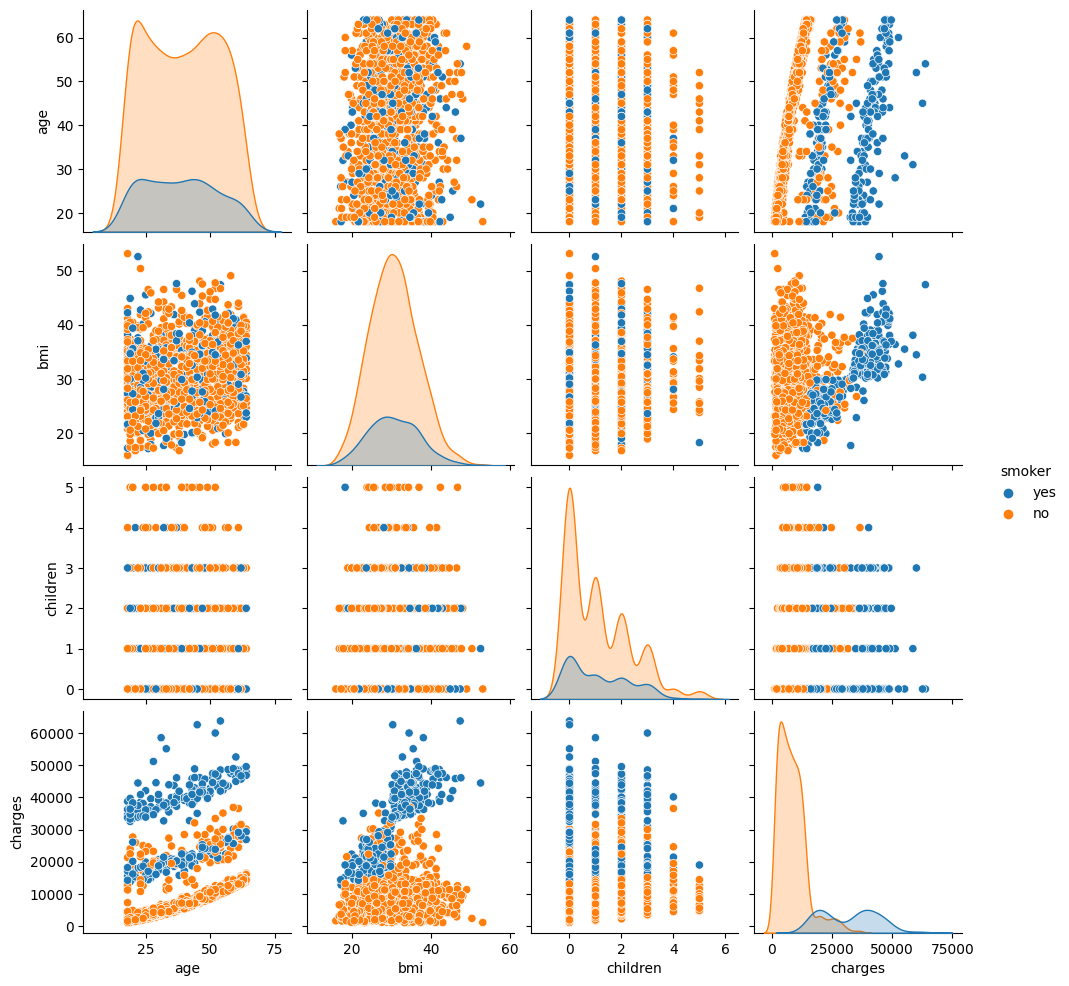

In [13]:
sns.pairplot(df_1, hue='smoker')

In [14]:
# 범주형 변수 더미화 (원핫인코딩)
df_1_encoded = pd.get_dummies(df_1, columns=['sex', 'smoker', 'region'])

In [15]:
# 데이터 분할 (train/test)
X = df_1_encoded.drop('charges', axis=1)
y = df_1_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델링
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# RMSE (평균 제곱근 오차)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# R-squared (결정 계수)
r_squared = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('R-squared:', r_squared)


RMSE: 5796.2846592762735
R-squared: 0.7835929767120723


<Axes: >

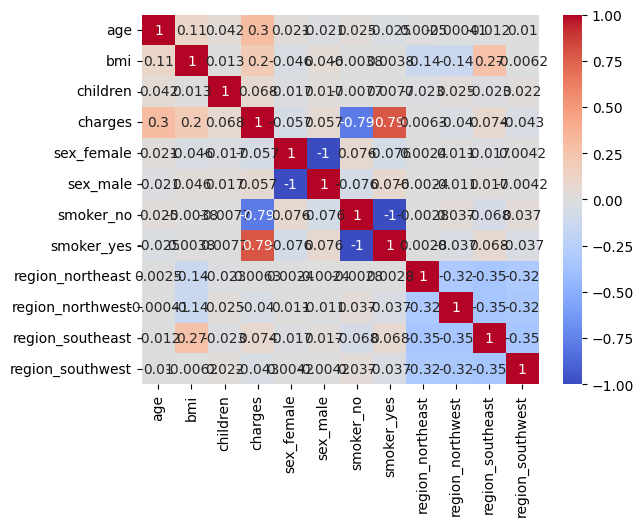

In [18]:
# 히트맵
sns.heatmap(df_1_encoded.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='sex', ylabel='charges'>

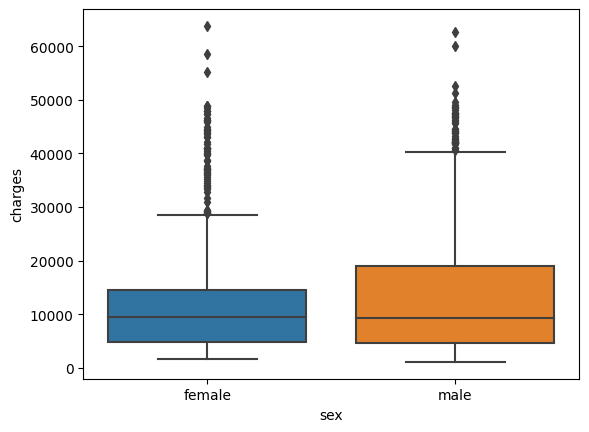

In [19]:
# 성별에 따른 보험료 분포
sns.boxplot(x='sex', y='charges', data=insurance)


<Axes: xlabel='smoker', ylabel='charges'>

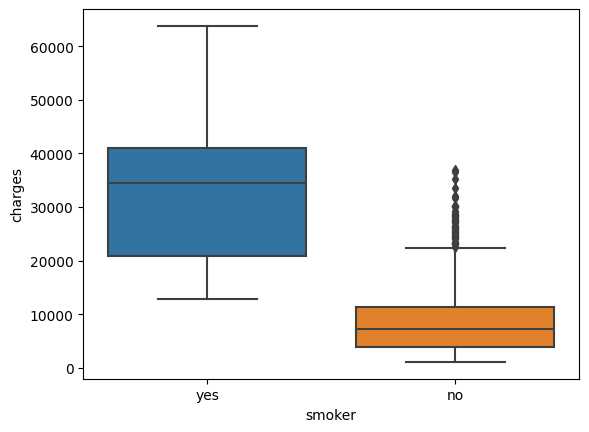

In [20]:
# 흡연 여부에 따른 보험료 분포
sns.boxplot(x='smoker', y='charges', data=insurance)

<Axes: xlabel='bmi', ylabel='charges'>

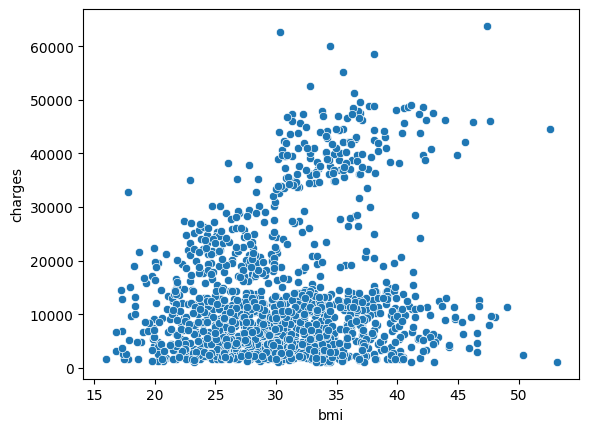

In [21]:
# BMI 지수에 따른 보험료 분포
sns.scatterplot(x='bmi', y='charges', data=insurance)

<Axes: xlabel='age', ylabel='charges'>

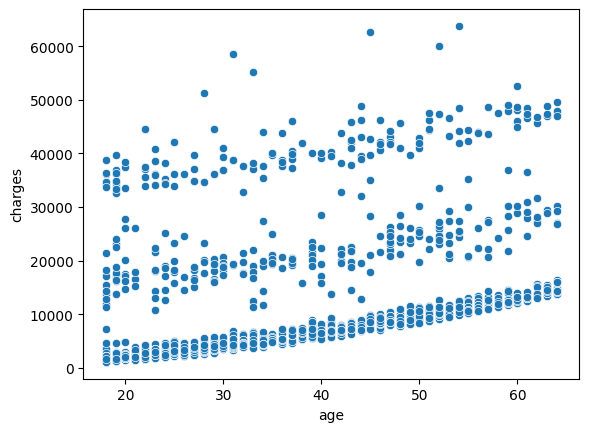

In [22]:
# 나이에 따른 보험료 분포
sns.scatterplot(x='age', y='charges', data=insurance)

In [23]:
df_1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [24]:
df_1.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<Axes: xlabel='age', ylabel='charges'>

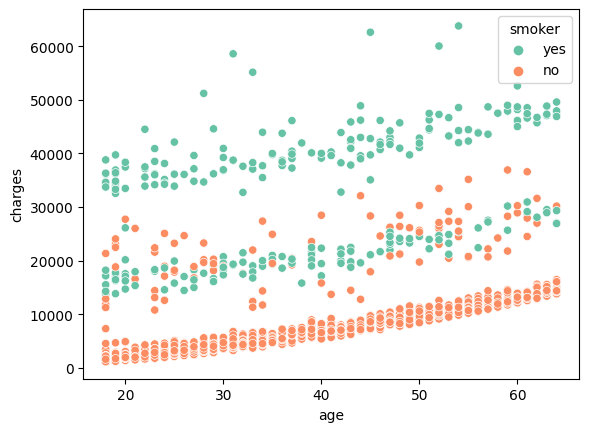

In [25]:
sns.scatterplot(x='age', y='charges', hue='smoker', palette='Set2', data=insurance)


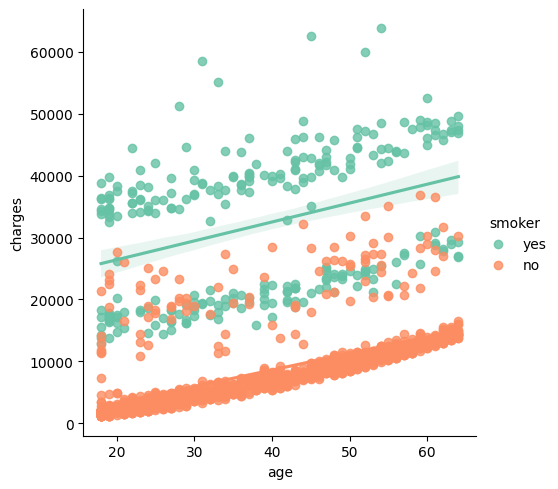

In [26]:
sns.lmplot(x='age', y='charges', hue='smoker', palette='Set2', data=insurance)


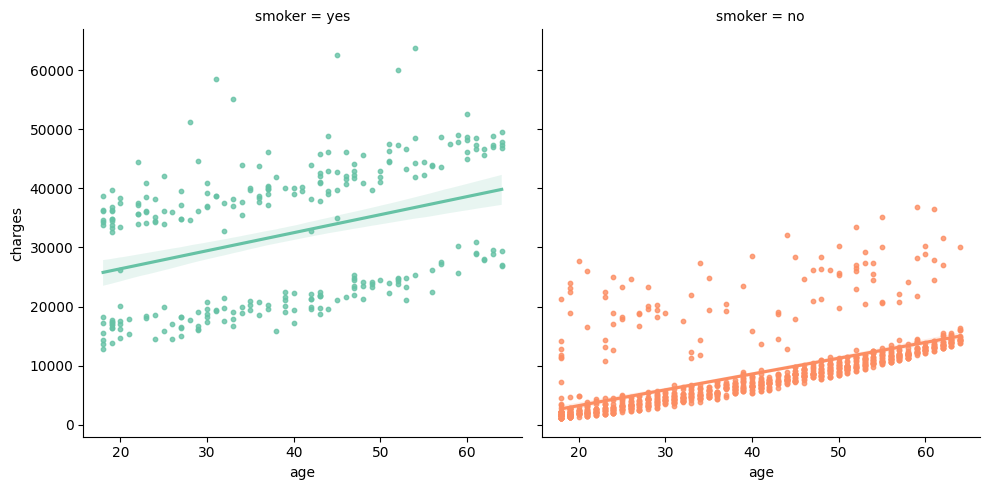

In [27]:
sns.lmplot(x='age', y='charges', hue='smoker', palette='Set2', data=insurance, col='smoker', scatter_kws={"s": 10})


In [28]:
max_charge = insurance['charges'].max()
min_charge = insurance['charges'].min()
median_charge = insurance['charges'].median()

print("Max charge: ", max_charge)
print("Min charge: ", min_charge)
print("Median charge: ", median_charge)


Max charge:  63770.42801
Min charge:  1121.8739
Median charge:  9382.033


In [29]:
df_1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


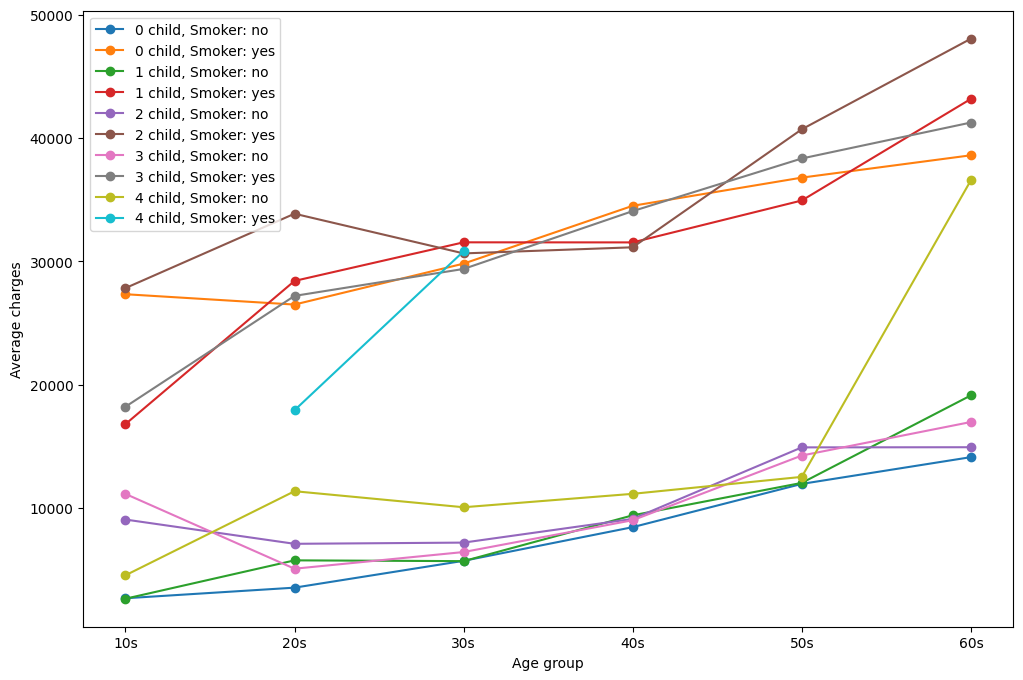

children       0             1             2             3             4   
smoker        no    yes     no    yes     no    yes     no    yes     no   
age_group                                                                  
10s         2700  27347   2663  16815   9082  27843  11160  18223   4561  \
20s         3561  26508   5773  28425   7115  33873   5096  27211  11378   
30s         5735  29828   5709  31554   7212  30655   6448  29396  10078   
40s         8465  34515   9424  31547   9132  31150   9026  34083  11166   
50s        11971  36799  12053  34944  14932  40715  14270  38350  12541   
60s        14140  38609  19145  43180  14944  48058  16988  41264  36580   

children       5      4      5  
smoker        no    yes    yes  
age_group                       
10s         4688      0      0  
20s         5110  17942      0  
30s         7711  30827  19023  
40s        11028      0      0  
50s        12593      0      0  
60s            0      0      0  
children        0 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 연령대 그룹화 함수
def age_group(age):
    if age < 20:
        return '10s'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return '60s'

# 연령대 그룹 열 추가
df_1['age_group'] = df_1['age'].apply(age_group)

# 연령대, 자녀 수, 흡연 여부 그룹화하여 그룹별 보험료 평균 계산
grouped = df_1.groupby(['age_group', 'children', 'smoker'])['charges'].mean().reset_index()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(0, 5):
    for smoker_status in ['no', 'yes']:
        age_group = grouped[(grouped['children'] == i) & (grouped['smoker'] == smoker_status)]['age_group']
        charges = grouped[(grouped['children'] == i) & (grouped['smoker'] == smoker_status)]['charges']
        ax.plot(age_group, charges, marker='o', label=f'{i} child, Smoker: {smoker_status}')
ax.set_xlabel('Age group')
ax.set_ylabel('Average charges')
ax.legend()
plt.show()

# 데이터값 표로 나타내기
grouped_pivot = grouped.pivot(index='age_group', columns=['children', 'smoker'], values='charges').fillna(0)

# 무한대 값을 대체할 정수 값 지정 (예: -1)
grouped_pivot = grouped_pivot.replace(np.inf, -1)

# 정수로 변환
grouped_pivot = grouped_pivot.round().astype(int)

print(grouped_pivot)

# 표 형식 조정
grouped_pivot_str = grouped_pivot.applymap(lambda x: f'{x:,}')
print(grouped_pivot_str)


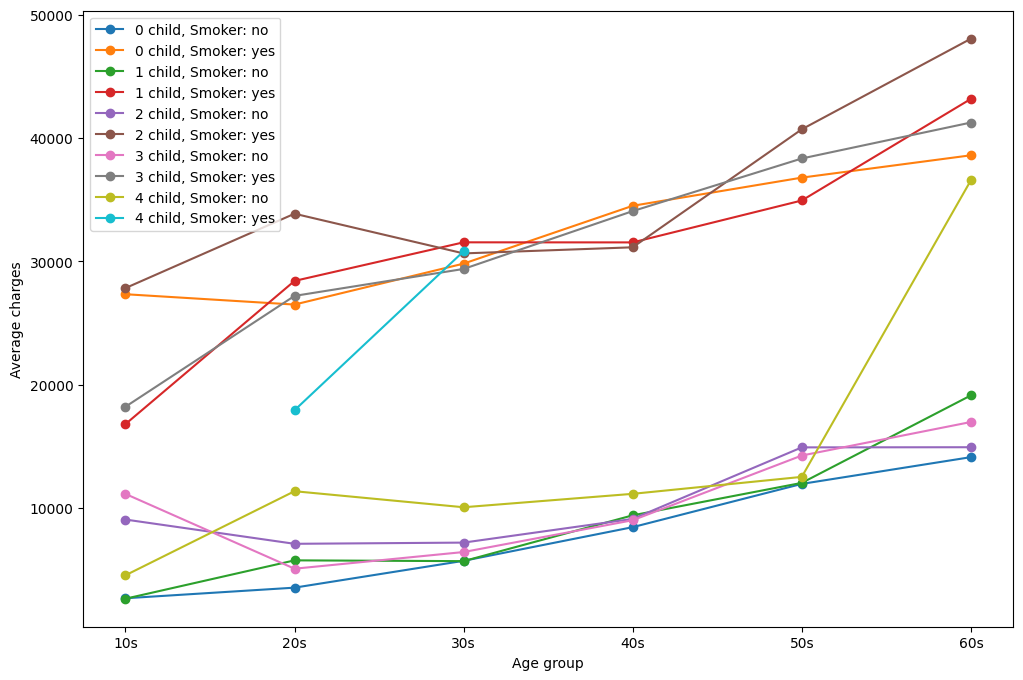

children       0             1             2             3             4   
smoker        no    yes     no    yes     no    yes     no    yes     no   
age_group                                                                  
10s         2700  27347   2663  16815   9082  27843  11160  18223   4561  \
20s         3561  26508   5773  28425   7115  33873   5096  27211  11378   
30s         5735  29828   5709  31554   7212  30655   6448  29396  10078   
40s         8465  34515   9424  31547   9132  31150   9026  34083  11166   
50s        11971  36799  12053  34944  14932  40715  14270  38350  12541   
60s        14140  38609  19145  43180  14944  48058  16988  41264  36580   

children       5      4      5  
smoker        no    yes    yes  
age_group                       
10s         4688      0      0  
20s         5110  17942      0  
30s         7711  30827  19023  
40s        11028      0      0  
50s        12593      0      0  
60s            0      0      0  
children        0 

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 연령대 그룹화 함수
def age_group(age):
    if age < 20:
        return '10s'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return '60s'

# 연령대 그룹 열 추가
df_1['age_group'] = df_1['age'].apply(age_group)

# 연령대, 자녀 수, 흡연 여부 그룹화하여 그룹별 보험료 평균 계산
grouped = df_1.groupby(['age_group', 'children', 'smoker'])['charges'].mean().reset_index()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(0, 5):
    for smoker_status in ['no', 'yes']:
        age_group = grouped[(grouped['children'] == i) & (grouped['smoker'] == smoker_status)]['age_group']
        charges = grouped[(grouped['children'] == i) & (grouped['smoker'] == smoker_status)]['charges']
        ax.plot(age_group, charges, marker='o', label=f'{i} child, Smoker: {smoker_status}')
ax.set_xlabel('Age group')
ax.set_ylabel('Average charges')
ax.legend()
plt.show()

# 데이터값 표로 나타내기
# grouped_pivot = grouped.pivot(index='age_group', columns=['children', 'smoker'], values='charges')
# print(grouped_pivot)

grouped_pivot = grouped.pivot(index='age_group', columns=['children', 'smoker'], values='charges').fillna(0)
grouped_pivot = grouped_pivot.round().astype(int)

# 결측값과 무한대 값을 0으로 대체
grouped_pivot = grouped.pivot(index='age_group', columns=['children', 'smoker'], values='charges').fillna(0)

# 무한대 값을 대체할 정수 값 지정 (예: -1)
grouped_pivot = grouped_pivot.replace(np.inf, -1)

# 정수로 변환
grouped_pivot = grouped_pivot.round().astype(int)

print(grouped_pivot)

# 표 형식 조정
grouped_pivot_str = grouped_pivot.applymap(lambda x: f'{x:,}')
print(grouped_pivot_str)

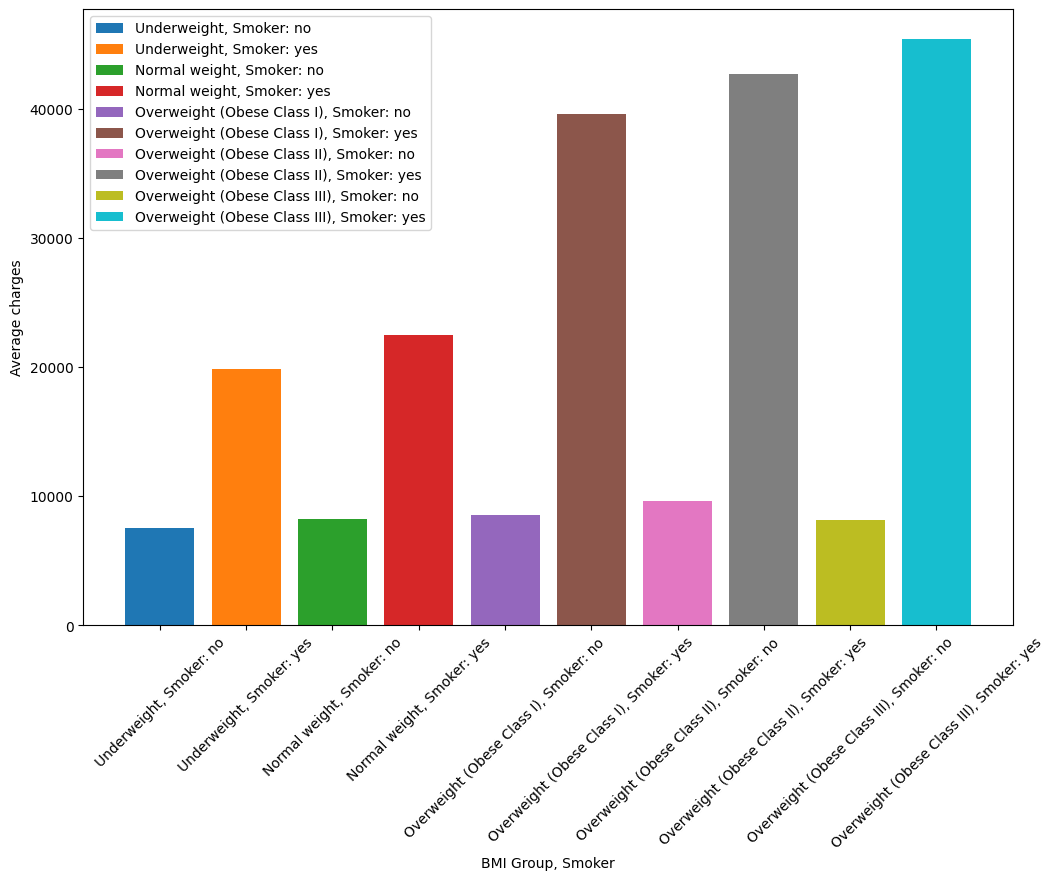

smoker                              no        yes
bmi_group                                        
Normal weight                 8,257.96  22,495.87
Overweight (Obese Class I)    8,532.14  39,640.59
Overweight (Obese Class II)   9,670.44  42,753.62
Overweight (Obese Class III)  8,179.66  45,467.79
Underweight                   7,515.71  19,839.28


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# BMI 그룹화 함수
def bmi_group(bmi):
    if bmi < 25:
        return 'Underweight'
    elif 25 <= bmi < 30:
        return 'Normal weight'
    elif 30 <= bmi < 35:
        return 'Overweight (Obese Class I)'
    elif 35 <= bmi < 40:
        return 'Overweight (Obese Class II)'
    else:
        return 'Overweight (Obese Class III)'

# BMI 그룹 열 추가
df_1['bmi_group'] = df_1['bmi'].apply(bmi_group)

# BMI 그룹, 흡연 여부 그룹화하여 그룹별 보험료 평균 계산
grouped = df_1.groupby(['bmi_group', 'smoker'])['charges'].mean().reset_index()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 8))
for bmi_group in ['Underweight', 'Normal weight', 'Overweight (Obese Class I)',
                 'Overweight (Obese Class II)', 'Overweight (Obese Class III)']:
    for smoker_status in ['no', 'yes']:
        charges = grouped[(grouped['bmi_group'] == bmi_group) & (grouped['smoker'] == smoker_status)]['charges']
        ax.bar(f'{bmi_group}, Smoker: {smoker_status}', charges, label=f'{bmi_group}, Smoker: {smoker_status}')
ax.set_xlabel('BMI Group, Smoker')
ax.set_ylabel('Average charges')
ax.legend()
plt.xticks(rotation=45)
plt.show()

# 데이터값 표로 나타내기
grouped_pivot = grouped.pivot(index='bmi_group', columns='smoker', values='charges').fillna(0)

# 표 형식 조정
grouped_pivot_str = grouped_pivot.applymap(lambda x: f'{x:,.2f}')
print(grouped_pivot_str)


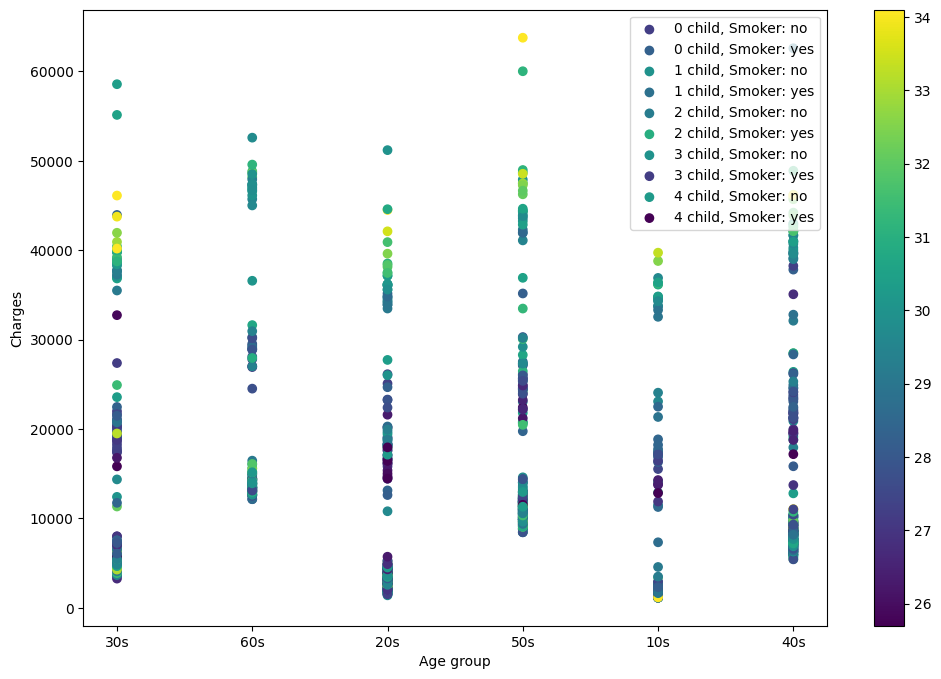

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# 연령대 그룹화 함수
def age_group(age):
    if age < 20:
        return '10s'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return '60s'

# 연령대 그룹 열 추가
df_1['age_group'] = df_1['age'].apply(age_group)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(0, 5):
    for smoker_status in ['no', 'yes']:
        age_group = df_1[(df_1['children'] == i) & (df_1['smoker'] == smoker_status)]['age_group']
        charges = df_1[(df_1['children'] == i) & (df_1['smoker'] == smoker_status)]['charges']
        bmi = df_1[(df_1['children'] == i) & (df_1['smoker'] == smoker_status)]['bmi']
        sc = ax.scatter(age_group, charges, c=bmi, cmap='viridis', label=f'{i} child, Smoker: {smoker_status}')
plt.colorbar(sc)  # 색상 막대 표시
ax.set_xlabel('Age group')
ax.set_ylabel('Charges')
ax.legend()
plt.show()


In [ ]:
# 연령대 그룹화 함수
def age_group(age):
    if age < 20:
        return '10s'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return '60s'

# 연령대 그룹 열 추가
df_1['age_group'] = df_1['age'].apply(age_group).astype(str)  # 문자열로 변환

# 연령대, 자녀 수, 흡연 여부 그룹화하여 그룹별 보험료 평균 계산
grouped = df_1.groupby(['age_group', 'children', 'smoker'])['charges'].mean().reset_index()

# 그룹별 평균 보험료 출력
print(grouped)


   age_group  children smoker       charges
0        10s         0     no   2700.477607
1        10s         0    yes  27346.821912
2        10s         1     no   2663.349341
3        10s         1    yes  16814.788550
4        10s         2     no   9081.659076
..       ...       ...    ...           ...
57       60s         2     no  14943.715475
58       60s         2    yes  48058.007467
59       60s         3     no  16987.616416
60       60s         3    yes  41263.627183
61       60s         4     no  36580.282160

[62 rows x 4 columns]


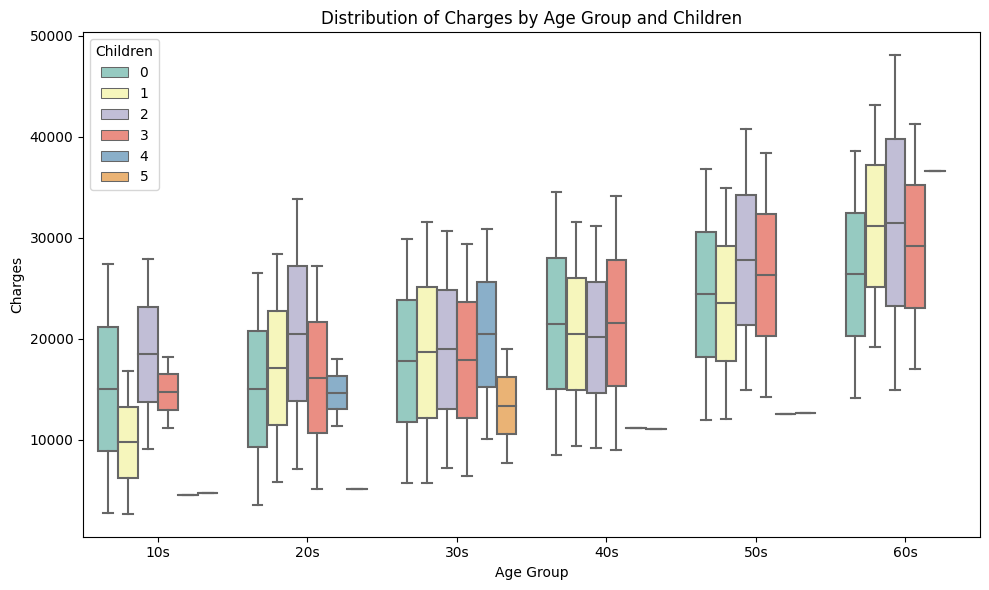

In [ ]:
import seaborn as sns

# 그래프 생성
plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped, x='age_group', y='charges', hue='children', palette='Set3')
plt.xlabel('Age Group')
plt.ylabel('Charges')
plt.title('Distribution of Charges by Age Group and Children')
plt.legend(title='Children')
plt.tight_layout()
plt.show()


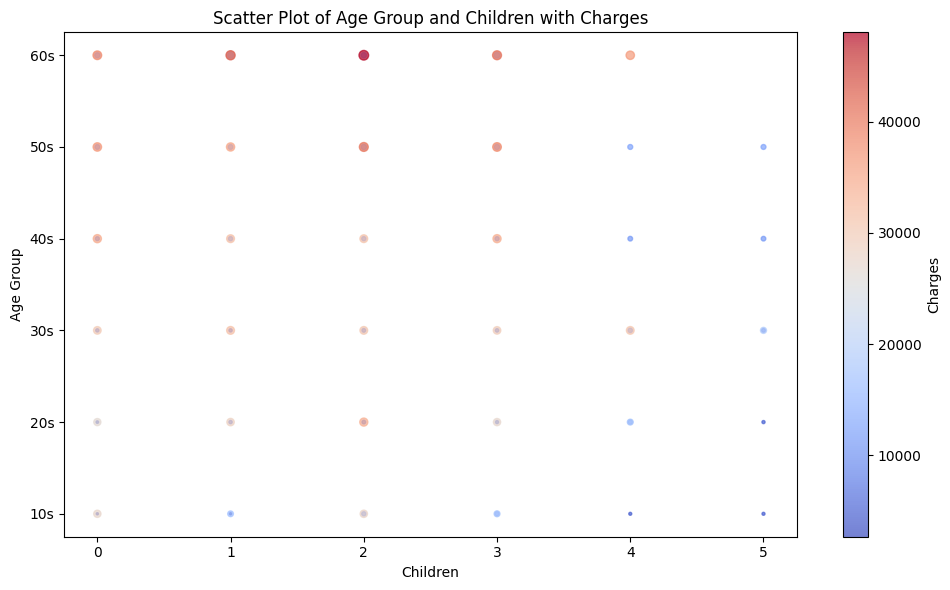

In [ ]:
# 그래프 생성
plt.figure(figsize=(10, 6))
plt.scatter(x=grouped['children'], y=grouped['age_group'], s=grouped['charges'] / 1000, c=grouped['charges'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Charges')
plt.xlabel('Children')
plt.ylabel('Age Group')
plt.title('Scatter Plot of Age Group and Children with Charges')
plt.tight_layout()
plt.show()


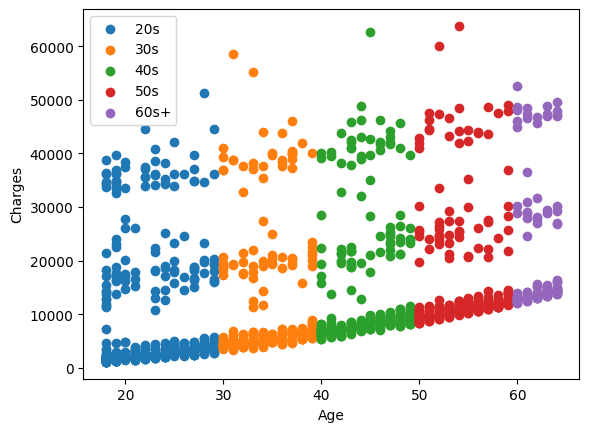

In [ ]:
# 연령대 구하기
insurance['age_group'] = pd.cut(insurance['age'], bins=[0, 29, 39, 49, 59, 100], labels=['20s', '30s', '40s', '50s', '60s+'])

# 산점도 그리기
plt.scatter(insurance[insurance['age_group'] == '20s']['age'], insurance[insurance['age_group'] == '20s']['charges'], label='20s')
plt.scatter(insurance[insurance['age_group'] == '30s']['age'], insurance[insurance['age_group'] == '30s']['charges'], label='30s')
plt.scatter(insurance[insurance['age_group'] == '40s']['age'], insurance[insurance['age_group'] == '40s']['charges'], label='40s')
plt.scatter(insurance[insurance['age_group'] == '50s']['age'], insurance[insurance['age_group'] == '50s']['charges'], label='50s')
plt.scatter(insurance[insurance['age_group'] == '60s+']['age'], insurance[insurance['age_group'] == '60s+']['charges'], label='60s+')

# 축 이름 설정
plt.xlabel('Age')
plt.ylabel('Charges')

# 범례 표시
plt.legend()

# 그래프 보여주기
plt.show()


In [ ]:
df_1['age_group'] = df_1['age'] // 10


In [ ]:
df_1.groupby(['age_group', 'children'])['charges'].mean()


age_group  children
1          0            8557.034670
           1            4078.493262
           2           14198.497355
           3           13514.674287
           4            4561.188500
           5            4687.797000
2          0            8085.605575
           1           10303.495803
           2           12808.010757
           3           10199.640688
           4           12472.284312
           5            5110.288712
3          0           11564.328988
           1           11201.331818
           2           11980.050756
           3           12318.493205
           4           16994.449595
           5            9326.810779
4          0           15174.490454
           1           13382.600331
           2           14714.383911
           3           16185.489295
           4           11165.933897
           5           11027.894530
5          0           14796.798092
           1           15805.908968
           2           20328.250050
        

In [ ]:
df_pivot = pd.pivot_table(df_1, values='charges', index=['age_group', 'smoker', 'region'], columns=['children'], aggfunc='mean')


In [ ]:
insurance_pivot = insurance.pivot_table(index='age_group', columns='children', values='charges', aggfunc='mean')


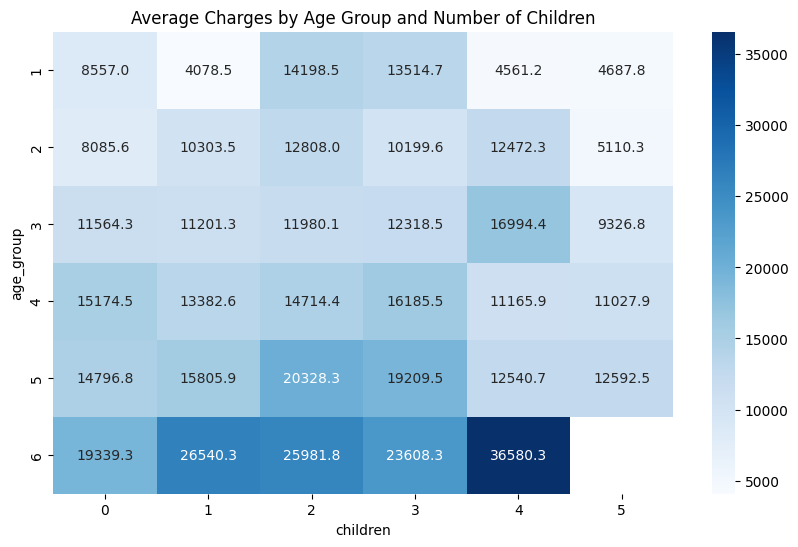

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(insurance_pivot, annot=True, fmt='.1f', cmap='Blues')
plt.title('Average Charges by Age Group and Number of Children') # 연령대와 자녀 수에 따른 평균 보험료
plt.show()


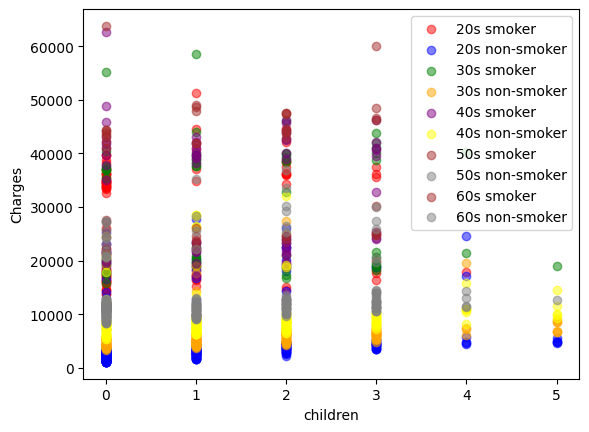

In [ ]:
# 연령대 구하기
insurance['age_group'] = pd.cut(insurance['age'], bins=[0, 29, 39, 49, 59, 100], labels=['20s', '30s', '40s', '50s', '60s+'])


# 산점도 그리기
plt.scatter(insurance[(insurance['age_group'] == '20s') & (insurance['smoker'] == 'yes')]['children'], insurance[(insurance['age_group'] == '20s') & (insurance['smoker'] == 'yes')]['charges'], color='red', alpha=0.5, label='20s smoker')
plt.scatter(insurance[(insurance['age_group'] == '20s') & (insurance['smoker'] == 'no')]['children'], insurance[(insurance['age_group'] == '20s') & (insurance['smoker'] == 'no')]['charges'], color='blue', alpha=0.5, label='20s non-smoker')

plt.scatter(insurance[(insurance['age_group'] == '30s') & (insurance['smoker'] == 'yes')]['children'], insurance[(insurance['age_group'] == '30s') & (insurance['smoker'] == 'yes')]['charges'], color='green', alpha=0.5, label='30s smoker')
plt.scatter(insurance[(insurance['age_group'] == '30s') & (insurance['smoker'] == 'no')]['children'], insurance[(insurance['age_group'] == '30s') & (insurance['smoker'] == 'no')]['charges'], color='orange', alpha=0.5, label='30s non-smoker')

plt.scatter(insurance[(insurance['age_group'] == '40s') & (insurance['smoker'] == 'yes')]['children'], insurance[(insurance['age_group'] == '40s') & (insurance['smoker'] == 'yes')]['charges'], color='purple', alpha=0.5, label='40s smoker')
plt.scatter(insurance[(insurance['age_group'] == '40s') & (insurance['smoker'] == 'no')]['children'], insurance[(insurance['age_group'] == '40s') & (insurance['smoker'] == 'no')]['charges'], color='yellow', alpha=0.5, label='40s non-smoker')

plt.scatter(insurance[(insurance['age_group'] == '50s') & (insurance['smoker'] == 'yes')]['children'], insurance[(insurance['age_group'] == '50s') & (insurance['smoker'] == 'yes')]['charges'], color='brown', alpha=0.5, label='50s smoker')
plt.scatter(insurance[(insurance['age_group'] == '50s') & (insurance['smoker'] == 'no')]['children'], insurance[(insurance['age_group'] == '50s') & (insurance['smoker'] == 'no')]['charges'], color='gray', alpha=0.5, label='50s non-smoker')

plt.scatter(insurance[(insurance['age_group'] == '60s') & (insurance['smoker'] == 'yes')]['children'], insurance[(insurance['age_group'] == '60s') & (insurance['smoker'] == 'yes')]['charges'], color='brown', alpha=0.5, label='60s smoker')
plt.scatter(insurance[(insurance['age_group'] == '60s') & (insurance['smoker'] == 'no')]['children'], insurance[(insurance['age_group'] == '60s') & (insurance['smoker'] == 'no')]['charges'], color='gray', alpha=0.5, label='60s non-smoker')

plt.xlabel('children')
plt.ylabel('Charges')

# 범례 표시
plt.legend()

# 그래프 보여주기
plt.show()


In [ ]:
df_1.shape

(1338, 8)

In [ ]:

df_1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_group'],
      dtype='object')

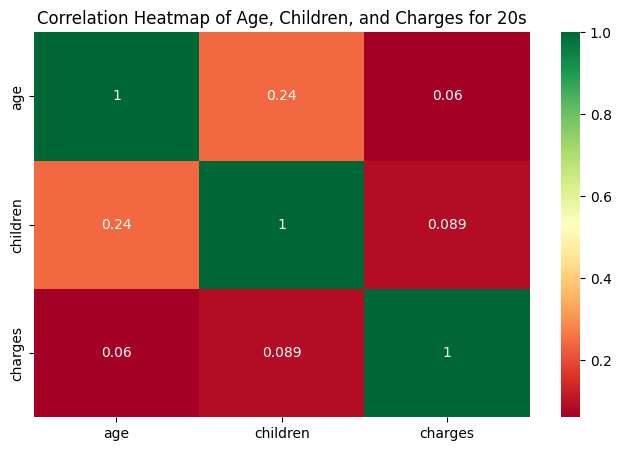

In [ ]:

df_20s = df_1[df_1['age_group'] == '20s']
Selected_features_20s = ['age', 'children', 'charges']
X_20s = df_20s[Selected_features_20s]

plt.subplots(figsize=(8, 5))
sns.heatmap(X_20s.corr(), annot=True, cmap="RdYlGn")
plt.title('Correlation Heatmap of Age, Children, and Charges for 20s')
plt.show()

C:\Users\jaehong\AppData\Local\Temp\ipykernel_8276\4123295866.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_20s['smoker'] = X_20s['smoker'].map({'no': 0, 'yes': 1})


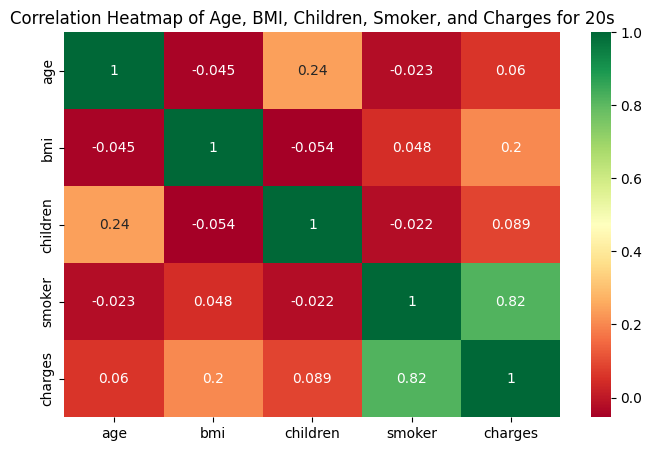

In [ ]:
df_20s = df_1[df_1['age_group'] == '20s']
Selected_features_20s = ['age', 'bmi', 'children', 'smoker', 'charges']
X_20s = df_20s[Selected_features_20s]

# 'smoker' 열을 숫자 값으로 변환
X_20s['smoker'] = X_20s['smoker'].map({'no': 0, 'yes': 1})

plt.subplots(figsize=(8, 5))
sns.heatmap(X_20s.corr(), annot=True, cmap="RdYlGn")
plt.title('Correlation Heatmap of Age, BMI, Children, Smoker, and Charges for 20s')
plt.show()


C:\Users\jaehong\AppData\Local\Temp\ipykernel_8276\3226268931.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_30s['smoker'] = X_30s['smoker'].map({'no': 0, 'yes': 1})


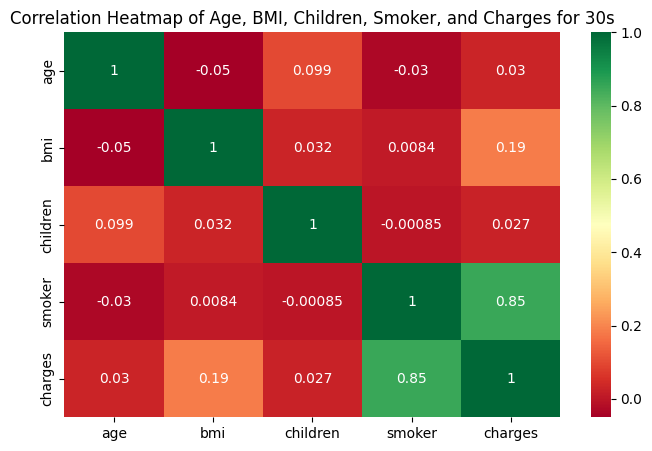

In [ ]:
df_30s = df_1[df_1['age_group'] == '30s']
Selected_features_30s = ['age', 'bmi', 'children', 'smoker', 'charges']
X_30s = df_30s[Selected_features_30s]

# 'smoker' 열을 숫자 값으로 변환
X_30s['smoker'] = X_30s['smoker'].map({'no': 0, 'yes': 1})

plt.subplots(figsize=(8, 5))
sns.heatmap(X_30s.corr(), annot=True, cmap="RdYlGn")
plt.title('Correlation Heatmap of Age, BMI, Children, Smoker, and Charges for 30s')
plt.show()


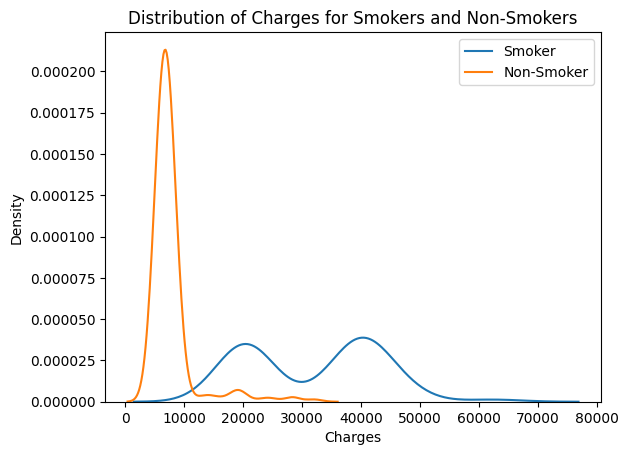

In [ ]:
# 흡연자와 비흡연자의 'charges' 분포 비교:

# 가운데 구간 데이터만 추출
middle_data = df_1[(df_1['age'] >= 35) & (df_1['age'] <= 45)]

# 흡연자와 비흡연자 데이터 분리
smoker_data = middle_data[middle_data['smoker'] == 'yes']
non_smoker_data = middle_data[middle_data['smoker'] == 'no']

# 'charges' 분포 비교
sns.kdeplot(smoker_data['charges'], label='Smoker')
sns.kdeplot(non_smoker_data['charges'], label='Non-Smoker')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.title("Distribution of Charges for Smokers and Non-Smokers")
plt.legend()
plt.show()


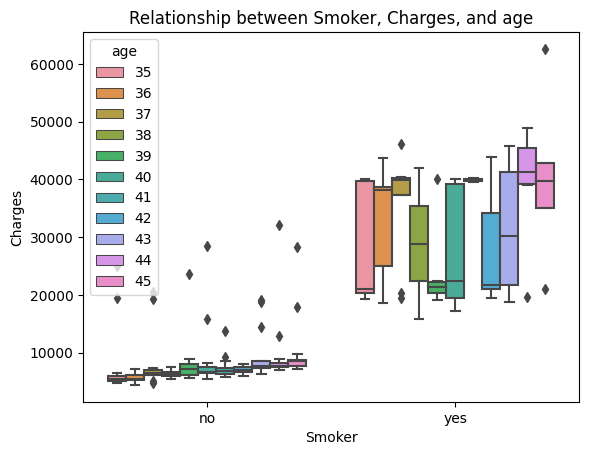

In [ ]:
# 다른 변수들과의 관계 분석: 

# 다른 변수들과의 관계 분석 (예시: 'bmi')
sns.boxplot(x='smoker', y='charges', hue='age', data=middle_data)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title("Relationship between Smoker, Charges, and age")
plt.legend(title='age')
plt.show()


In [ ]:
# 통계적 분석:

from scipy.stats import ttest_ind

# 독립표본 t-검정
t_stat, p_value = ttest_ind(smoker_data['charges'], non_smoker_data['charges'])

print("Independent t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)


Independent t-test results:
t-statistic: 27.586026486487857
p-value: 1.0627125558795934e-82


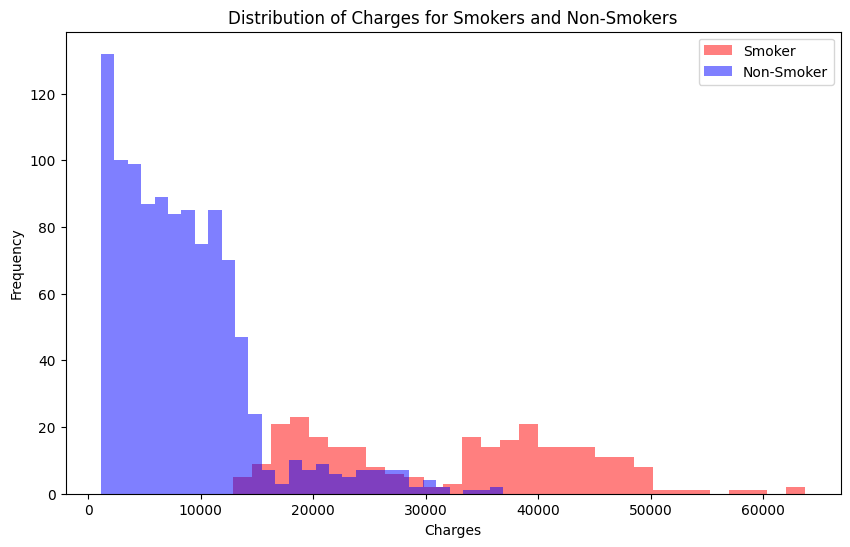

In [ ]:
import matplotlib.pyplot as plt

# 흡연자의 보험료
charges_smoker = df_1[df_1['smoker'] == 'yes']['charges']

# 비흡연자의 보험료
charges_non_smoker = df_1[df_1['smoker'] == 'no']['charges']

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(charges_smoker, bins=30, alpha=0.5, color='red', label='Smoker')
plt.hist(charges_non_smoker, bins=30, alpha=0.5, color='blue', label='Non-Smoker')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.legend()
plt.show()


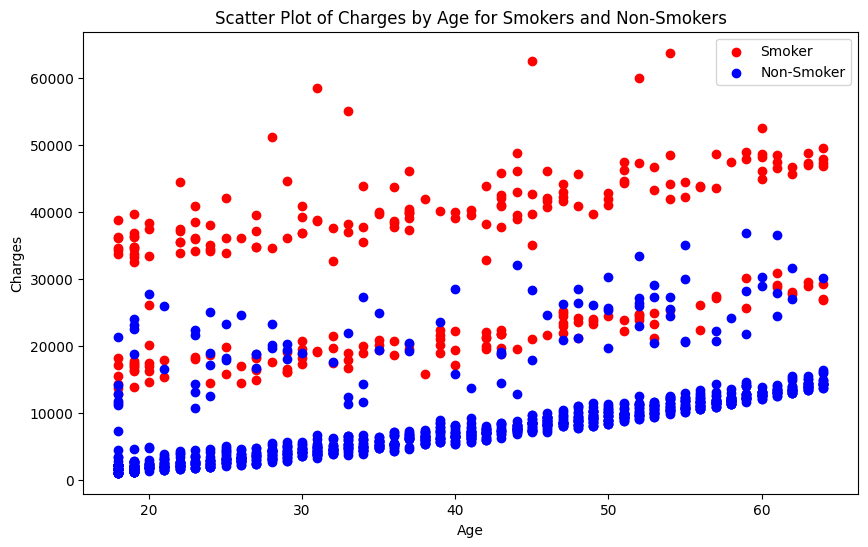

In [ ]:
import matplotlib.pyplot as plt

# 흡연자의 보험료와 나이
charges_smoker = df_1[df_1['smoker'] == 'yes']['charges']
age_smoker = df_1[df_1['smoker'] == 'yes']['age']

# 비흡연자의 보험료와 나이
charges_non_smoker = df_1[df_1['smoker'] == 'no']['charges']
age_non_smoker = df_1[df_1['smoker'] == 'no']['age']

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(age_smoker, charges_smoker, color='red', label='Smoker')
plt.scatter(age_non_smoker, charges_non_smoker, color='blue', label='Non-Smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter Plot of Charges by Age for Smokers and Non-Smokers')
plt.legend()
plt.show()


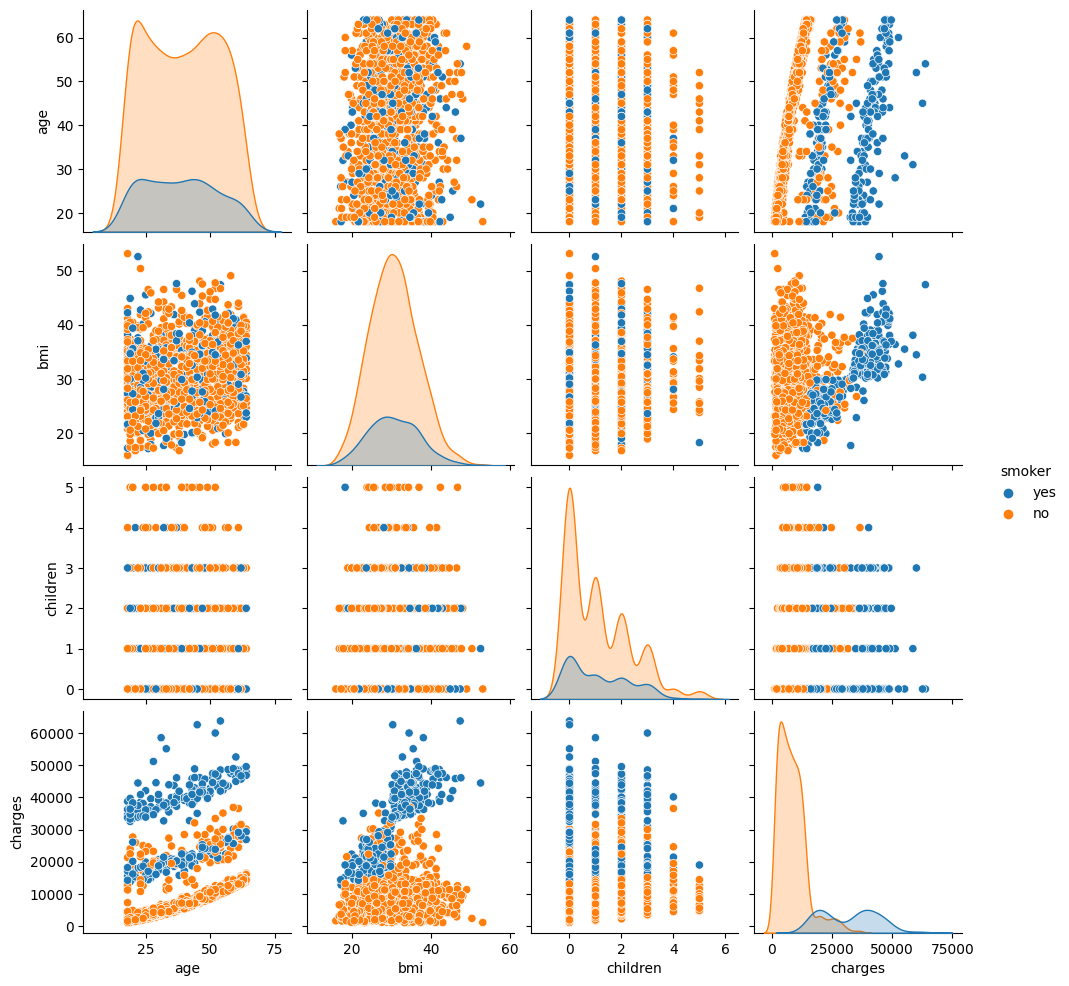

In [ ]:
sns.pairplot(df_1, hue='smoker')

In [ ]:
summary_stats = df_1.describe()
print(summary_stats)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [ ]:
variable_counts = df_1.nunique()
print(variable_counts)

age            47
sex             2
bmi           548
children        6
smoker          2
region          4
charges      1337
age_group       5
dtype: int64


In [ ]:
missing_values = df_1.isnull().sum()
print(missing_values)

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
age_group    0
dtype: int64
